
# CODE TO PREDICT STOCK MARKET PRICE
# Dr. Ryan Ahmed @STEMplicity
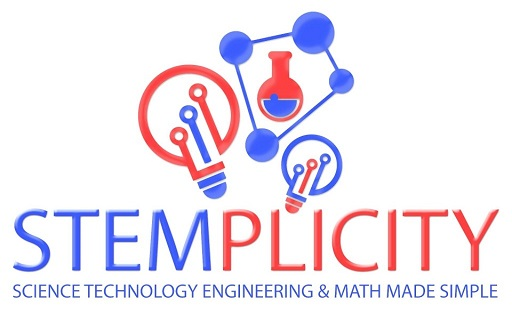



# PROBLEM STATEMENT

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
stock = pd.read_csv('S&P500_Stock_Data.csv')

In [3]:
stock

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663
5,2.143637,56.060598,2187.344909
6,2.148647,51.513208,2263.049249
7,2.176184,53.475909,2281.496374
8,2.125352,63.668422,2355.163011
9,2.225682,56.993396,2326.330337


In [4]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764327
max,3.000000,70.000000,3000.000000


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Interest Rates    1000 non-null float64
Employment        1000 non-null float64
S&P 500 Price     1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


# STEP #2: VISUALIZE DATASET

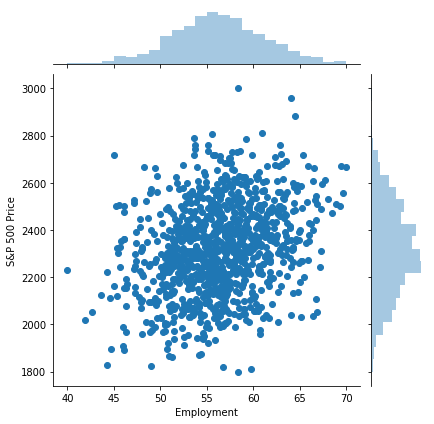

In [6]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = stock)

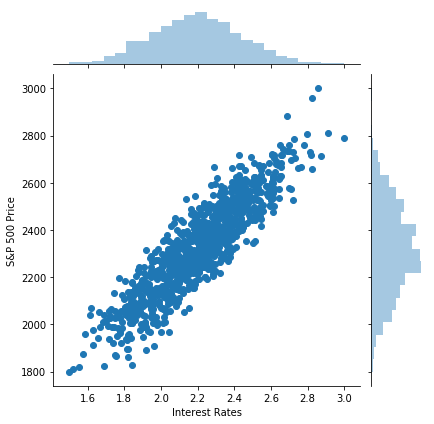

In [7]:
sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = stock)

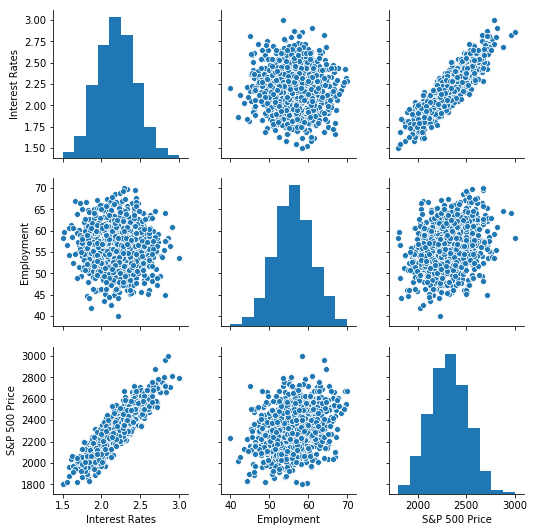

In [8]:
sns.pairplot(stock)

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [9]:
y = stock ['S&P 500 Price']

In [10]:
y

0      2206.680582
1      2486.474488
2      2405.868337
3      2140.434475
4      2411.275663
5      2187.344909
6      2263.049249
7      2281.496374
8      2355.163011
9      2326.330337
10     2078.553895
11     2337.504507
12     2485.774097
13     2478.413528
14     2665.008070
15     2057.393366
16     2423.590565
17     2605.470983
18     2303.851816
19     2095.440317
20     2495.243030
21     1871.361622
22     2213.495900
23     2173.474255
24     2505.572687
25     2394.960918
26     2607.334886
27     2711.535184
28     2287.893451
29     2301.183322
          ...     
970    2355.225478
971    2234.581817
972    2582.279480
973    2381.789544
974    2467.307182
975    2300.848035
976    2562.764485
977    2224.040699
978    2131.219474
979    2031.346274
980    2245.594050
981    2120.948889
982    2508.751044
983    2269.322372
984    2085.534307
985    2497.913238
986    2405.684511
987    2718.811585
988    2533.151582
989    2378.392345
990    2206.946180
991    2086.

In [11]:
X = stock[['Interest Rates', 'Employment']]

In [12]:
X

,Interest Rates,Employment
0,1.943859,55.413571
1,2.258229,59.546305
2,2.215863,57.414687
3,1.977960,49.908353
4,2.437723,52.035492
5,2.143637,56.060598
6,2.148647,51.513208
7,2.176184,53.475909
8,2.125352,63.668422
9,2.225682,56.993396


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [92]:
X_train

,Interest Rates,Employment
261,2.030477,53.781869
608,2.205751,59.961388
187,2.297352,56.904053
727,2.654253,48.224886
499,2.140436,51.166702
649,2.502122,51.501475
968,2.334238,60.872658
504,2.436591,58.369919
734,1.879161,60.656195
953,2.210952,61.378565


In [93]:
X_test

,Interest Rates,Employment
306,2.471602,50.157572
416,1.685745,59.523363
697,2.685204,58.619537
671,1.826056,57.956690
776,2.374626,45.483602
672,2.307061,55.819913
203,2.236187,59.414731
515,2.700582,55.109735
777,2.089540,51.606339
626,2.175100,58.141306


# STEP#4: TRAINING THE MODEL

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
regressor = LinearRegression(fit_intercept = True)

In [96]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [731.19297496  12.25020717]
Linear Model Coefficients (b) 22.344750877914976


# STEP#5: EVALUATING THE MODEL 

In [98]:
y_predict = regressor.predict(X_test)
y_predict

array([2444.0037431 , 1984.12306541, 2703.84864305, 2067.52526346,
       2315.83829675, 2393.05713677, 2385.27172523, 2672.09709228,
       2182.3903261 , 2325.00539004, 2187.16696321, 2433.95832888,
       2021.41943257, 2283.62257416, 2210.02944282, 2344.76075764,
       2564.22223286, 2509.44881235, 2248.49695783, 2637.03956251,
       2513.71115026, 2343.24406674, 2279.80085794, 2273.2803858 ,
       2498.93658654, 2402.18130868, 2268.23455541, 2207.86612089,
       2222.81639346, 2306.87190794, 2618.95669185, 2349.83082643,
       2474.61405722, 2633.49540723, 2164.32181211, 2415.42910564,
       2385.77791229, 2535.41458236, 2275.21524992, 2459.29251848,
       2153.38601789, 2066.33986311, 2318.88139308, 2392.72016267,
       2146.00361923, 2055.15696724, 1968.16678299, 2352.43188011,
       2148.71058197, 2418.94161383, 2217.09887436, 2247.71395016,
       2457.50134705, 2433.68138793, 2155.27843598, 2273.54124161,
       2112.29742543, 2408.37143905, 2450.34739486, 2499.54064

In [99]:
y_test

306    2430.900994
416    2008.920092
697    2735.426271
671    2043.394926
776    2302.598911
672    2341.632103
203    2408.579162
515    2760.071808
777    2281.958219
626    2289.185468
207    2214.343525
91     2418.650394
584    2038.476313
588    2268.157830
232    2317.419986
850    2309.746169
633    2618.369756
815    2499.029019
640    2246.562536
282    2662.466996
16     2423.590565
846    2327.283786
794    2274.158790
935    2257.475721
407    2449.615039
618    2378.592772
971    2234.581817
131    2224.519934
663    2415.824930
829    2269.881977
          ...     
9      2326.330337
455    2255.098613
603    2347.988019
323    2280.548830
61     2166.298978
648    2136.267794
750    2659.708857
285    2264.499374
94     2309.845969
267    2199.720666
265    2258.252471
666    2625.200578
565    2271.519171
197    2426.426366
252    2625.632502
696    2457.778052
760    2324.146613
8      2355.163011
170    2193.473502
83     2265.169285
177    2394.704181
182    2178.

Text(0.5,1,'Multiple Linear Regression Predictions')

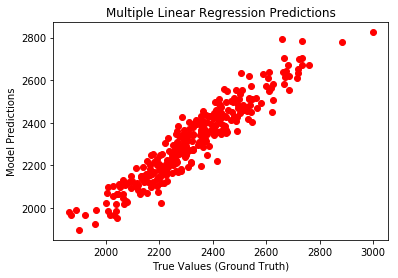

In [100]:
plt.scatter(y_test, y_predict, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

In [101]:
k = X_test.shape[1]
n = len(X_test)

In [102]:
n

300

In [103]:
k

2

In [104]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100

In [105]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  61.117 
MSE = 3735.28538451522 
MAE = 48.9846227225233 
R2 = 0.8950069223393504 
Adjusted R2 = 0.8942998982473596 
MAPE = 2.097530528434949


20% Testing, 80% Training

RMSE =  59.266 
MSE = 3512.4296338986837 
MAE = 46.90704539124721 
R2 = 0.9180495237428291 
Adjusted R2 = 0.9172175392122994 
MAPE = 2.01273653239247

# STEP #6: VISUALIZE THE RESULTS

In [108]:
from mpl_toolkits.mplot3d import Axes3D

In [110]:
x_surf, y_surf = np.meshgrid( np.linspace( stock['Interest Rates'].min(), stock['Interest Rates'].max(), 100),  np.linspace(stock['Employment'].min(), stock['Employment'].max() , 100))

In [111]:
x_surf.shape

(100, 100)

In [112]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()    } ) 

In [113]:
onlyX.shape

(10000, 2)

In [114]:
fittedY = regressor.predict(onlyX)

In [115]:
fittedY.shape

(10000,)

In [117]:
fittedY = fittedY.reshape(x_surf.shape)

In [118]:
fittedY.shape

(100, 100)

Text(0.5,0,'Stock index price')

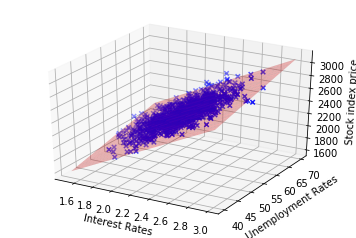

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( stock['Interest Rates'], stock['Employment'] , stock['S&P 500 Price'] , c = 'blue', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'red', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

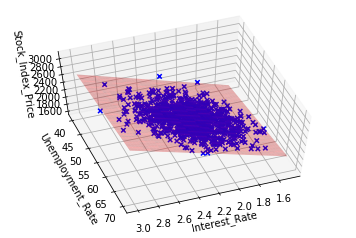

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stock['Interest Rates'],stock['Employment'],stock['S&P 500 Price'],c='blue', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='red', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(60, 70)
plt.show()

In [126]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,731.192975
Employment,12.250207


# EXCELLENT JOB! NOW YOU'RE FAMILIAR WITH MULTIPLE LINEAR REGRESSION